<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_dsp_core_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test basic DSP functionalities

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [45]:
from optic.dsp.core import pnorm, signal_power, decimate, resample, lowPassFIR, firFilter, clockSamplingInterp, quantizer, upsample, pulseShape, finddelay, delaySignal
from optic.utils import parameters
from optic.plot import eyediagram, plotPSD, pconst
from optic.comm.modulation import modulateGray
from optic.comm.metrics import fastBERcalc
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

from optic.models.devices import adc
from optic.dsp.clockRecovery import gardnerClockRecovery

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test rational resample

(0.0, 0.1)

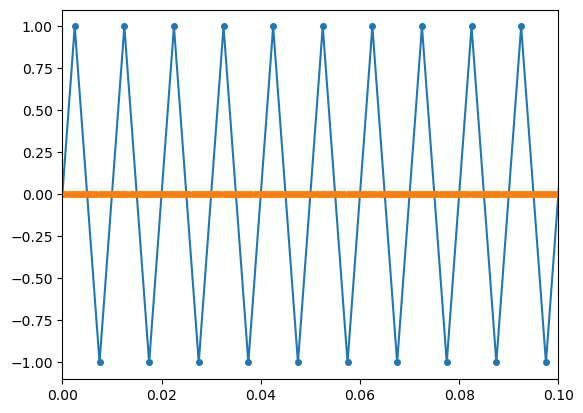

In [47]:
Fs = 400
fc = 100

t = np.arange(0,4096)*(1/Fs)
π = np.pi

sig = np.sin(2*π*fc*t)

plt.plot(t, sig,'-o',markersize=4);
plt.xlim(0, 10*1/fc)

paramDec = parameters()
paramDec.SpS_in = 4
paramDec.SpS_out = 16
paramDec.Rs = fc

resFactor = paramDec.SpS_out/paramDec.SpS_in

t_dec = np.arange(0, int(resFactor*4096))*(1/(resFactor*Fs))
sig_dec = resample(sig, paramDec)

plt.plot(t_dec, sig_dec,'-o',markersize=4);
plt.xlim(0, 10*1/fc)

## Test sampling clock converter

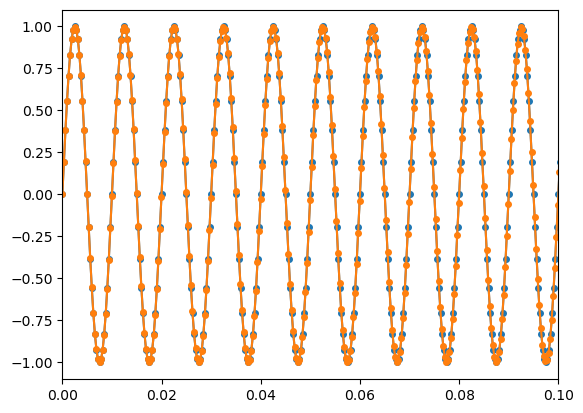

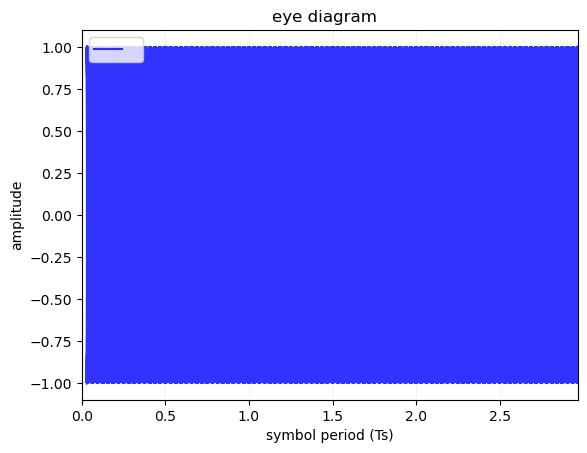

In [48]:
Fs = 3200
fc = 100

t = np.arange(0, 300000)*(1/Fs)
π = np.pi

# generate sinusoidal signal
sig = np.sin(2*π*fc*t)

plt.plot(t, sig,'-o',markersize=4);
plt.xlim(min(t), max(t))

# intermpolate signal to a given clock sampling frequency and jitter
Fs_in = Fs
Fs_out = 1.001*Fs
AAF = False
jitter_rms = 1e-9

t_dec = clockSamplingInterp(t.reshape(-1,1), Fs_in, Fs_out, jitter_rms)
sig_dec = clockSamplingInterp(sig.reshape(-1,1), Fs_in, Fs_out, jitter_rms)
plt.plot(t_dec, sig_dec,'-o',markersize=4);
plt.xlim(0, 10*1/fc)

eyediagram(sig_dec.reshape(-1,), sig_dec.size, int(Fs//fc), n=3, ptype='fast', plotlabel=None)

## Test signal quantizer

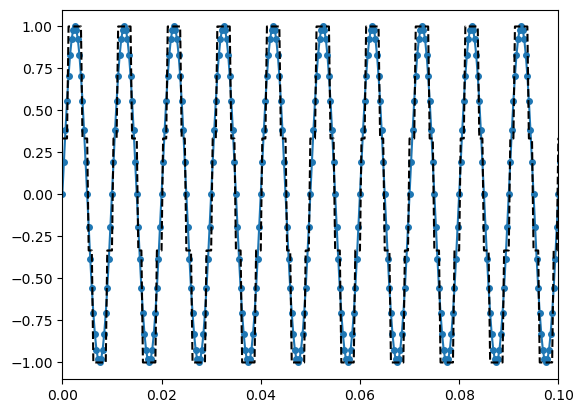

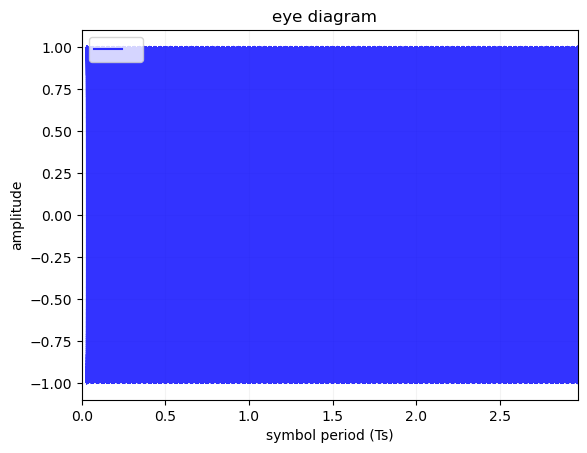

In [6]:
Fs = 3200
fc = 100

t = np.arange(0, 300000)*(1/Fs)
π = np.pi

# generate sinusoidal signal
sig = np.sin(2*π*fc*t) #+ np.sin(6*π*fc*t)/3 + np.sin(10*π*fc*t)/5

plt.plot(t, sig,'-o',markersize=4);
plt.xlim(min(t), max(t))

# quantizer
nBits = 2
sig_q = quantizer(sig.reshape(-1,1), nBits)

plt.plot(t, sig_q,'--k',markersize=4);
plt.xlim(0, 10*1/fc)

eyediagram(sig_dec.reshape(-1,), sig_dec.size, int(Fs//fc), n=3, ptype='fast', plotlabel=None)

(0.0, 0.1)

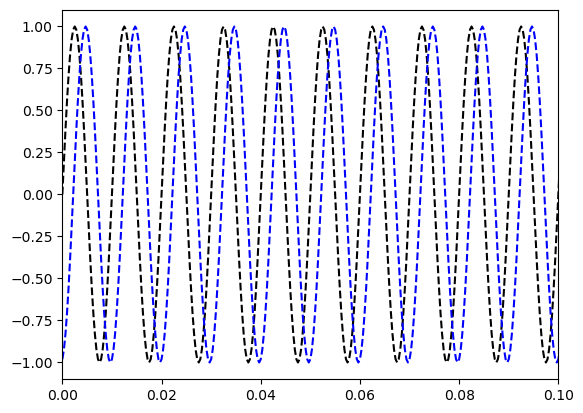

In [51]:
plt.figure(1)
plt.plot(t, sig,'--k',markersize=4);

sigd = delaySignal(sig, 7*1/Fs, Fs)

plt.plot(t, sigd, '--b',markersize=4)
plt.xlim(0, 10*1/fc)